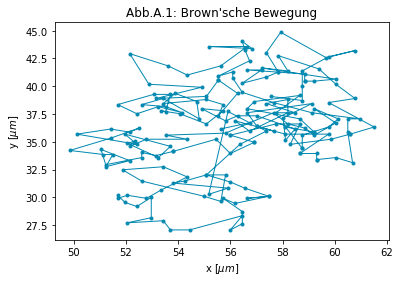

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

t,x,y=np.loadtxt("Messung.dat", skiprows=1, usecols=(1,2,3), converters={1:comma_to_float, 2:comma_to_float, 3:comma_to_float}, unpack=True)

plt.plot(x,y, marker=".", color="#0489B1", linewidth=1)
plt.xlabel("x $[\mu m]$")
plt.ylabel("y $[\mu m]$")
plt.title("Abb.A.1: Brown'sche Bewegung")
plt.savefig("C:/Users/Max/v223.pdf", format="PDF")

In [3]:
dt=np.array([])
dx=np.array([])
dy=np.array([])
i=0
while i < len(t)-1:
    dt=np.append(dt,t[i+1]-t[i])
    dx=np.append(dx,x[i+1]-x[i])
    dy=np.append(dy,y[i+1]-y[i])
    i=i+1
r_squared=dx**2+dy**2 

r_squared_mean=np.mean(r_squared)
print("r_squared_mean= ",r_squared_mean)
r_squared_mean_std=np.std(r_squared)/np.sqrt(len(r_squared))
print("r_squared_mean_std= ",r_squared_mean_std)
dt_mean=np.mean(dt)
print("dt_mean= ", dt_mean)

r_squared_mean=  2.24324464851
r_squared_mean_std=  0.29850781362
dt_mean=  1.00100990099


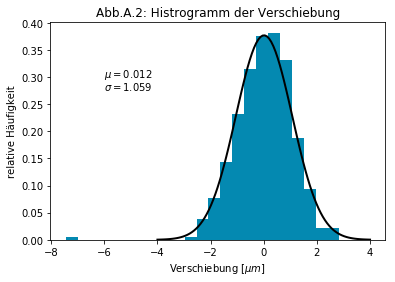

In [73]:
all_data=np.append(dx,dy)
plt.hist(all_data, normed=1, bins=23, color="#0489B1")

mu=np.mean(all_data)
sigma=np.std(all_data)
gauss=mlab.normpdf(np.linspace(-4,4,100), mu , sigma)

plt.plot(np.linspace(-4,4,100), gauss,"b-", color="black", linewidth=2)
plt.title("Abb.A.2: Histrogramm der Verschiebung")
plt.xlabel("Verschiebung $[\mu m]$")
plt.ylabel("relative Häufigkeit")

plt.text(-6,0.3, "$\mu={}$".format(round(mu,3)))
plt.text(-6,0.275, "$\sigma={}$".format(round(sigma,3)))

plt.savefig("C:/Users/Max/v223_2.pdf", format="PDF")

1.99483124981


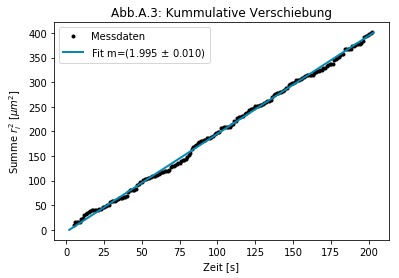

In [53]:
r_kumm=np.cumsum(r_squared)
plt.plot(t[3:-2], r_kumm[3:-1]-50, marker='.', color='black', linewidth=0, label="Messdaten")
plt.xlabel('Zeit [s]')
plt.ylabel('Summe $r_i^2$ $[\mu m^2]$')
plt.title('Abb.A.3: Kummulative Verschiebung')

from scipy.optimize import curve_fit

def linear(x,a,b):
    return a*x+b

popt, pcov=curve_fit(linear, t[:-1], r_kumm)
plt.plot(t[:-1], linear(t[:-1],*popt)-50, linewidth=2, color="#0489B1", label="Fit m=({} $\pm$ 0.010)".format(round(popt[0],3)))

print(popt[0])
plt.legend()

#plt.savefig("C:/Users/Max/v223.pdf", format='PDF')